## relax-challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [2]:
#import user data
users = pd.read_csv('takehome_users.csv',encoding = "ISO-8859-1")
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
#import user engagement data
user_engage = pd.read_csv('takehome_user_engagement.csv',encoding = "ISO-8859-1")
user_engage.time_stamp = pd.to_datetime(user_engage.time_stamp)
user_engage.index=user_engage.time_stamp
user_engage.drop(labels='time_stamp',axis=1,inplace=True)

In [4]:
user_engage.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [5]:
#Group by user_id and resample to 1 week period, sum over period
df_agg = user_engage.groupby([pd.Grouper(freq='W'),'user_id']).sum()
df_agg

visited
time_stamp user_id         
2012-06-03 563            1
           1693           1
           1995           1
           2120           1
           2136           1
...                     ...
2014-06-08 11869          1
           11885          1
           11895          3
           11906          1
           11924          3

[68807 rows x 1 columns]

In [6]:
#find all user id's with a sum of 3 or more indicating an adopted user
df_adopt = df_agg[df_agg.visited>=3].unstack(level=1).melt()
adopted_users = pd.DataFrame(df_adopt.user_id.unique(),
                             index=range(df_adopt.user_id.unique().shape[0]),
                             columns=['user_id'])
adopted_users.head()

,user_id
0,1693
1,728
2,11764
3,5297
4,6171


In [7]:
adopted_users['adopted_user'] = 1
adopted_users.head()

,user_id,adopted_user
0,1693,1
1,728,1
2,11764,1
3,5297,1
4,6171,1


In [8]:
adopted_users

,user_id,adopted_user
0,1693,1
1,728,1
2,11764,1
3,5297,1
4,6171,1
...,...,...
1440,7868,1
1441,7927,1
1442,9870,1
1443,10746,1


In [9]:
print('There are {} adopted users among total {} users'.format(
    len(adopted_users), len(users.object_id)))

There are 1445 adopted users among total 12000 users


In [10]:
#create df of features by merge two tables
df_join = users.merge(adopted_users,how='left',
                      left_on='object_id',
                      right_on='user_id')
df_join.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN,NaN


In [11]:
len(df_join)

12000

In [12]:
df_join['adopted_user'].fillna(0, inplace = True)

In [13]:
#drop irrelevant columns
df_join = df_join.drop(['object_id','name', 'email','user_id'],axis=1)

In [14]:
df_join.head()

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [15]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_time               12000 non-null  object 
 1   creation_source             12000 non-null  object 
 2   last_session_creation_time  8823 non-null   float64
 3   opted_in_to_mailing_list    12000 non-null  int64  
 4   enabled_for_marketing_drip  12000 non-null  int64  
 5   org_id                      12000 non-null  int64  
 6   invited_by_user_id          6417 non-null   float64
 7   adopted_user                12000 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 843.8+ KB


In [16]:
#track whether a user was invited
df_join['was_invited'] = False
df_join.loc[df_join['invited_by_user_id'].notna(), 'was_invited'] = True

In [29]:
df_join['last_session_creation_time'] = df_join['last_session_creation_time'].astype(float)
df_join['creation_time'] = df_join['creation_time'].astype(float)
df_join.head()

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,was_invited
0,1.398139e+18,GUEST_INVITE,1.398139e+18,1,0,11,10803.0,0,1
1,1.384487e+18,ORG_INVITE,1.396238e+18,0,0,1,316.0,1,1
2,1.363735e+18,ORG_INVITE,1.363735e+18,0,0,94,1525.0,0,1
3,1.369124e+18,GUEST_INVITE,1.369210e+18,0,0,1,5151.0,0,1
4,1.358418e+18,GUEST_INVITE,1.358850e+18,0,0,193,5240.0,0,1


In [19]:
#preprocessing for random forest
#convert boolean columns (adopted, was_invited) to integer columns
df_join['adopted_user'] = df_join.adopted_user.astype(int)
df_join['was_invited'] = df_join.was_invited.astype(int)

In [30]:
#one hot encode creation_source feature
df_create = pd.get_dummies(df_join['creation_source'])
df = pd.concat([df_join,df_create],axis=1)
df.drop('creation_source',axis=1,inplace=True)
df.head()

,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,was_invited,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1.398139e+18,1.398139e+18,1,0,11,10803.0,0,1,1,0,0,0,0
1,1.384487e+18,1.396238e+18,0,0,1,316.0,1,1,0,1,0,0,0
2,1.363735e+18,1.363735e+18,0,0,94,1525.0,0,1,0,1,0,0,0
3,1.369124e+18,1.369210e+18,0,0,1,5151.0,0,1,1,0,0,0,0
4,1.358418e+18,1.358850e+18,0,0,193,5240.0,0,1,1,0,0,0,0


In [35]:
df.isna().sum()

creation_time                    0
last_session_creation_time       0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted_user                     0
was_invited                      0
GUEST_INVITE                     0
ORG_INVITE                       0
PERSONAL_PROJECTS                0
SIGNUP                           0
SIGNUP_GOOGLE_AUTH               0
dtype: int64

In [36]:
df['invited_by_user_id'].fillna(0, inplace = True)

In [37]:
#train/test split
from sklearn.model_selection import train_test_split
X = df.drop(columns=['adopted_user'])
y = df[['adopted_user']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [38]:
from sklearn import preprocessing, model_selection, ensemble, metrics
#method to train, predict, and score the model
def train_predict_score(model, X_train, y_train, X_test, y_test):
    
    model.fit(X_train,y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_accuracy = metrics.accuracy_score(y_train,y_pred_train)
    train_auc = metrics.roc_auc_score(y_train,y_pred_train)
    test_accuracy = metrics.accuracy_score(y_test,y_pred_test)
    test_auc = metrics.roc_auc_score(y_test,y_pred_test)
    
    return {'train_accuracy':train_accuracy,
           'train_auc':train_auc,
           'test_accuracy':test_accuracy,
           'test_auc':test_auc}

In [39]:
#dataframe for model scores
df_scores = pd.DataFrame(columns=['model','train_accuracy','train_auc','test_accuracy','test_auc'])

In [40]:
#Random Forest model
rf_model = ensemble.RandomForestClassifier(random_state=42)

results = train_predict_score(rf_model, X_train, y_train, X_test, y_test)
results['model'] = 'Random Forest'
df_scores = df_scores.append(results, ignore_index=True)

/var/folders/br/5csq0j7577g07ks6s_07bc800000gn/T/ipykernel_7809/4194069080.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)
/var/folders/br/5csq0j7577g07ks6s_07bc800000gn/T/ipykernel_7809/546150051.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_scores = df_scores.append(results, ignore_index=True)


In [41]:
df_scores

,model,train_accuracy,train_auc,test_accuracy,test_auc
0,Random Forest,1.0,1.0,0.970833,0.890715


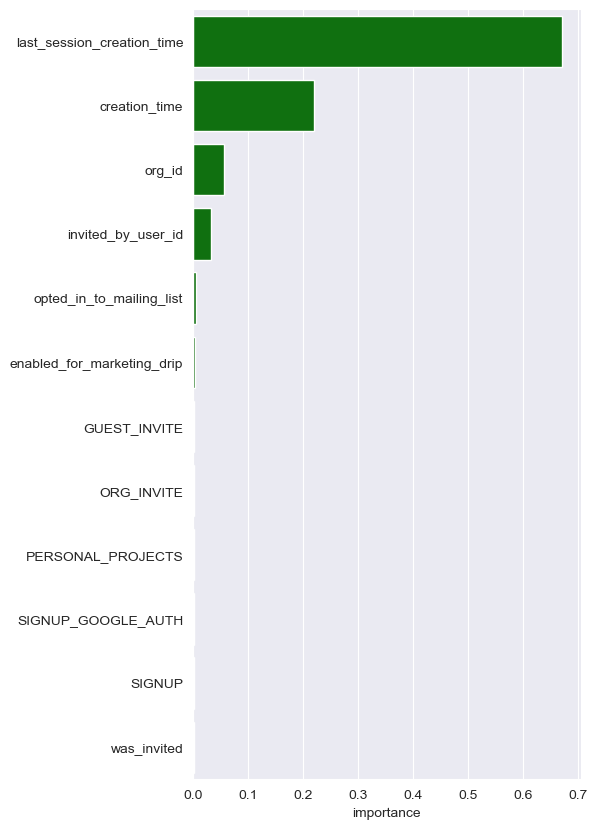

In [42]:
df_feature_importances = \
    pd.DataFrame(rf_model.feature_importances_, index=X_train.columns, columns=['importance']) \
        .sort_values(by='importance', ascending=False)

plt.figure(figsize=(5,10))
sns.barplot(data=df_feature_importances, y=df_feature_importances.index, 
            x='importance', color='green', orient='h');

we can see last_session_creation_time predict has the most weight on predicting future  user adoption .